# Importing Libs

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('HousingPrices-Amsterdam-August-2021.csv')
df.head()

,Unnamed: 0,Address,Zip,Price,Area,Room,Lon,Lat
0,1,"Blasiusstraat 8 2, Amsterdam",1091 CR,685000.0,64,3,4.907736,52.356157
1,2,"Kromme Leimuidenstraat 13 H, Amsterdam",1059 EL,475000.0,60,3,4.850476,52.348586
2,3,"Zaaiersweg 11 A, Amsterdam",1097 SM,850000.0,109,4,4.944774,52.343782
3,4,"Tenerifestraat 40, Amsterdam",1060 TH,580000.0,128,6,4.789928,52.343712
4,5,"Winterjanpad 21, Amsterdam",1036 KN,720000.0,138,5,4.902503,52.410538


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 924 entries, 0 to 923
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  924 non-null    int64  
 1   Address     924 non-null    object 
 2   Zip         924 non-null    object 
 3   Price       920 non-null    float64
 4   Area        924 non-null    int64  
 5   Room        924 non-null    int64  
 6   Lon         924 non-null    float64
 7   Lat         924 non-null    float64
dtypes: float64(3), int64(3), object(2)
memory usage: 57.9+ KB


## Data Cleaning

In [4]:
df.isna().sum()

Unnamed: 0    0
Address       0
Zip           0
Price         4
Area          0
Room          0
Lon           0
Lat           0
dtype: int64

In [5]:
df.dropna(inplace=True)

In [6]:
# check null values
df.isna().sum()

Unnamed: 0    0
Address       0
Zip           0
Price         0
Area          0
Room          0
Lon           0
Lat           0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.drop(['Unnamed: 0','Address','Zip'], axis=1, inplace=True)

In [9]:
df.head()

,Price,Area,Room,Lon,Lat
0,685000.0,64,3,4.907736,52.356157
1,475000.0,60,3,4.850476,52.348586
2,850000.0,109,4,4.944774,52.343782
3,580000.0,128,6,4.789928,52.343712
4,720000.0,138,5,4.902503,52.410538


In [10]:
df.describe()

,Price,Area,Room,Lon,Lat
count,9.200000e+02,920.000000,920.00000,920.000000,920.000000
mean,6.220654e+05,95.607609,3.56413,4.888652,52.363271
std,5.389942e+05,56.849699,1.57103,0.053118,0.024054
min,1.750000e+05,21.000000,1.00000,4.644819,52.291519
25%,3.500000e+05,60.000000,3.00000,4.855834,52.351925
50%,4.670000e+05,83.000000,3.00000,4.886818,52.364499
75%,7.000000e+05,113.000000,4.00000,4.922337,52.377545
max,5.950000e+06,623.000000,14.00000,5.029122,52.423805


In [11]:
Numerical_column = ['Price','Area','Room','Lon','Lat']

In [12]:
# to delete outliers
for col in Numerical_column:
    upper_limit = df[col].mean() + 3 * df[col].std()
    lower_limit = df[col].mean() - 3 * df[col].std()
    df = df[(df[col] <= upper_limit) & (df[col] >= lower_limit)]

## EDA

In [13]:
df

,Price,Area,Room,Lon,Lat
0,685000.0,64,3,4.907736,52.356157
1,475000.0,60,3,4.850476,52.348586
2,850000.0,109,4,4.944774,52.343782
3,580000.0,128,6,4.789928,52.343712
4,720000.0,138,5,4.902503,52.410538
...,...,...,...,...,...
919,750000.0,117,1,4.927757,52.354173
920,350000.0,72,3,4.890612,52.414587
921,350000.0,51,3,4.856935,52.363256
922,599000.0,113,4,4.965731,52.375268


In [14]:
def vaulize(col):
    plt.figure(figsize=(8,8))
    sns.histplot(data=df,x=col,kde=True)
    plt.title(f'{col} Distribution')
    plt.show()
    

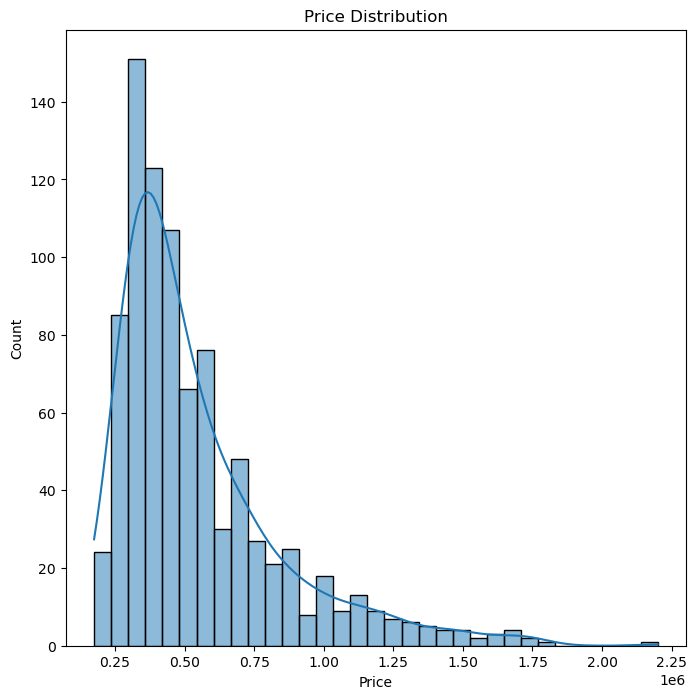

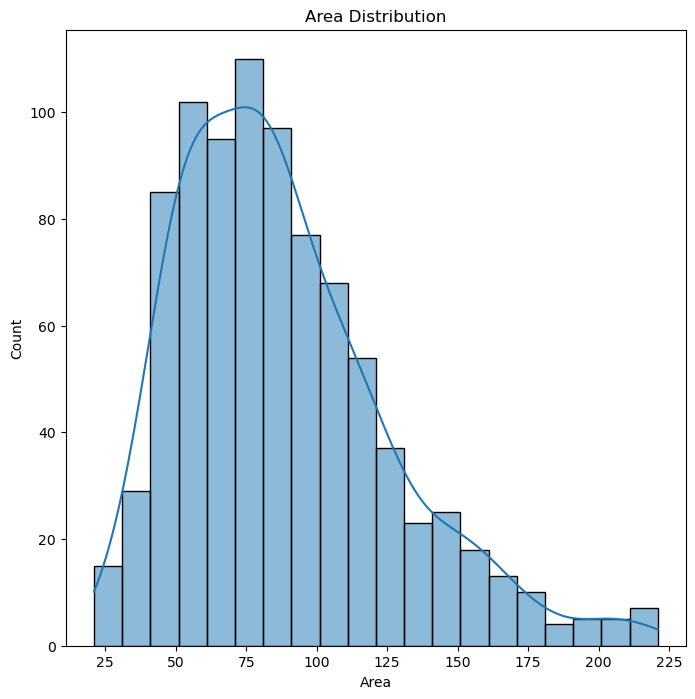

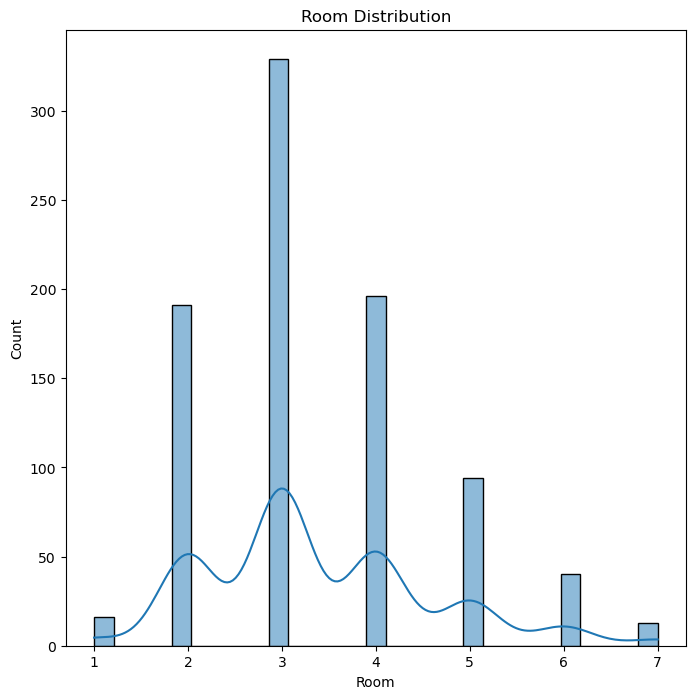

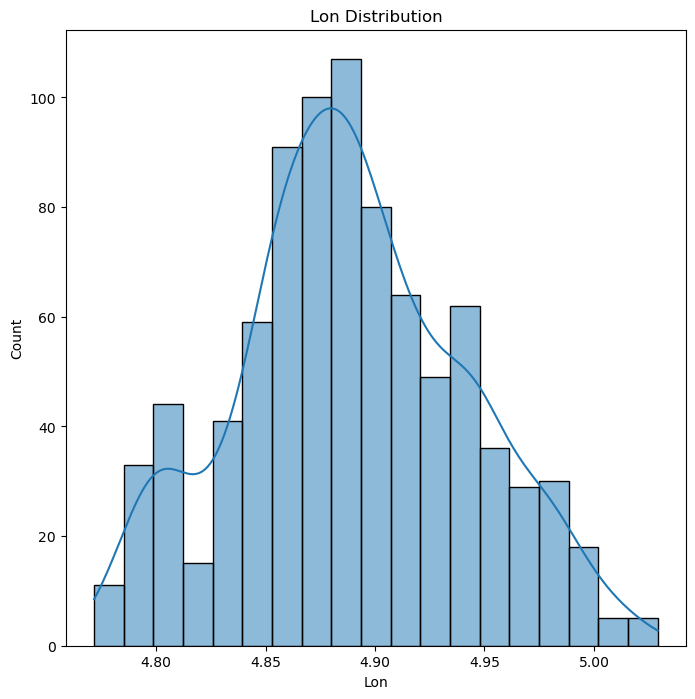

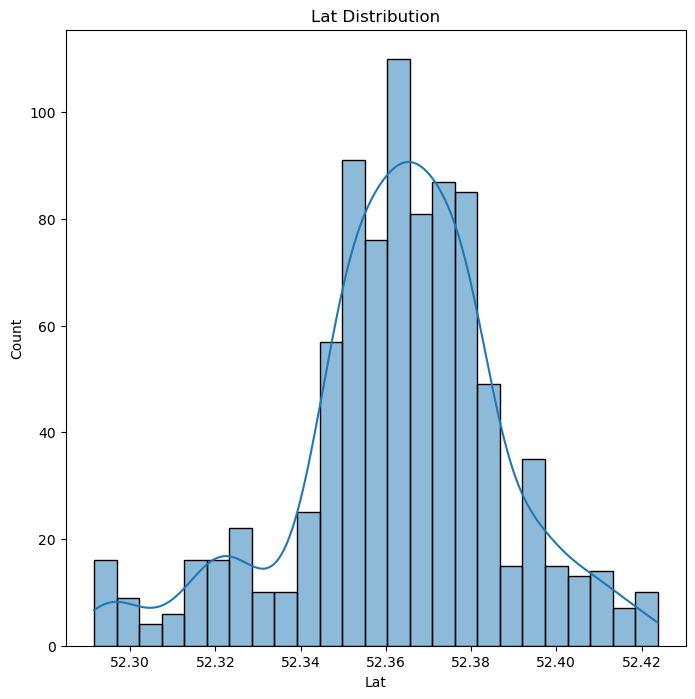

In [15]:
for col in Numerical_column:
    vaulize(col)

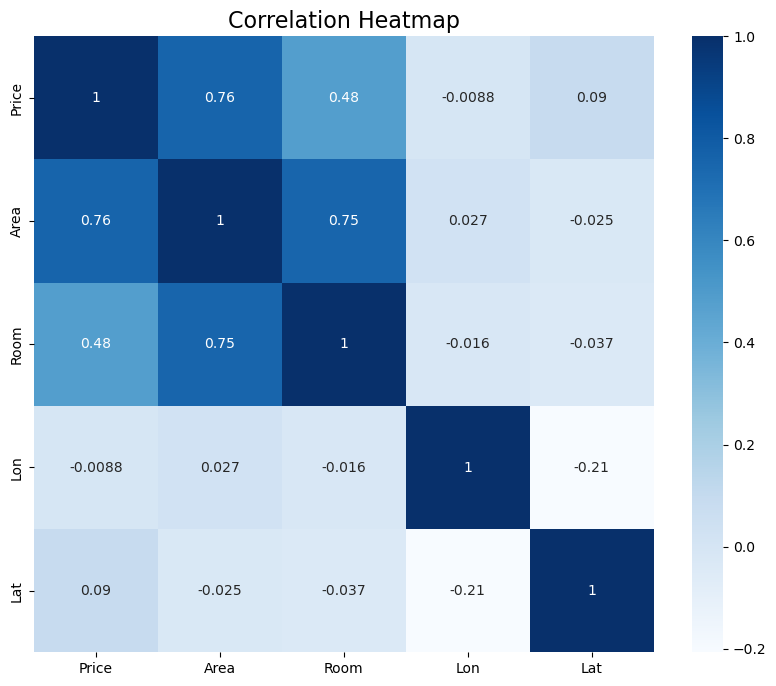

In [16]:
plt.figure(figsize=(10,8))
sns.heatmap(df[Numerical_column].corr(),annot=True, cmap='Blues')
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

## Data split

In [17]:
from sklearn.model_selection import train_test_split

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error,r2_score

In [20]:
X = df.drop(['Price'], axis=1) 
y = df['Price']

In [21]:
X

,Area,Room,Lon,Lat
0,64,3,4.907736,52.356157
1,60,3,4.850476,52.348586
2,109,4,4.944774,52.343782
3,128,6,4.789928,52.343712
4,138,5,4.902503,52.410538
...,...,...,...,...
919,117,1,4.927757,52.354173
920,72,3,4.890612,52.414587
921,51,3,4.856935,52.363256
922,113,4,4.965731,52.375268


In [22]:
y

0      685000.0
1      475000.0
2      850000.0
3      580000.0
4      720000.0
         ...   
919    750000.0
920    350000.0
921    350000.0
922    599000.0
923    300000.0
Name: Price, Length: 879, dtype: float64

In [23]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
models = [LinearRegression(), RandomForestRegressor() ,KNeighborsRegressor(), XGBRegressor()]

In [26]:
for model in models:
    model.fit(X_train,y_train)
    score = model.score(X_test, y_test)
    print(f"Model: {type(model).__name__}, Score: {score}")
    print("*" * 50)

Model: LinearRegression, Score: 0.5768515995802344
**************************************************
Model: RandomForestRegressor, Score: 0.7994330785672163
**************************************************
Model: KNeighborsRegressor, Score: 0.5617837272355586
**************************************************
Model: XGBRegressor, Score: 0.8025033059809492
**************************************************


In [27]:
for model in models:
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"Model: {type(model).__name__}, Mean Squared Error: {mse}")

Model: LinearRegression, Mean Squared Error: 29197085904.56793
Model: RandomForestRegressor, Mean Squared Error: 13839044715.467558
Model: KNeighborsRegressor, Mean Squared Error: 30236763622.385452
Model: XGBRegressor, Mean Squared Error: 13627200139.294306


#  The best Algorthm is XGB

In [28]:
Score = 0.80
print(f"The best algorthm is XGB and sroce={Score}")

The best algorthm is XGB and sroce=0.8


# Thanks